In [4]:
from pylab import *
from scipy.integrate import *
%matplotlib inline

In [102]:
def osc(y_vec,t,omega2=1.):
    #y_vec son las variables y and v respectivamente.
    dy = y_vec[1]
    dv = -omega2*y_vec[0]-0.01*y_vec[1]+0.5*sin(2*t)
    return array([dy,dv])

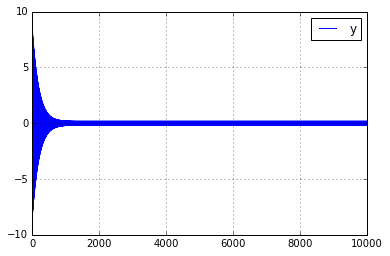

In [154]:
t = linspace(0,10000,100000)
ini = array([1.,8.])
sol = odeint(osc,ini,t)
plot(t,sol[:,0],label="y")
#plot(t,sol[:,1],label="v_y")
grid(True),legend()
show()

In [155]:
def root_trayec(func,pto_i,ti,error=1e-5):
    while abs(pto_i[0])>error:
        tip1 = ti - (pto_i[0]/pto_i[1])
        paso = odeint(func,pto_i,[ti,tip1])
        ti,pto_i = tip1,paso[-1]
    return ti,pto_i

In [156]:
ind = 49
#for i in range(ind):
#    print sol[i]
ti,pto_i=t[ind],sol[ind]
error = 1e-5
#while abs(pto_i[0])>error:
#    tip1 = ti - (pto_i[0]/pto_i[1])
#    paso = odeint(osc,pto_i,[ti,tip1])
#    ti,pto_i = tip1,paso[-1]
#print ti,pto_i
t_raiz,punto=root_trayec(osc,pto_i,ti)
print t_raiz,punto

-0.124238650911 [ -1.00522703e-07   8.07990018e+00]


In [157]:
num = len(t)
raices = zeros(num)
puntos=zeros((num,2))
j=0
for i in range(len(t)-1):
    if(sol[i][0]*sol[i+1][0]) < 0:
        raices[j],puntos[j]=root_trayec(osc,sol[i],t[i])
        j+=1
raices,puntos= raices[0:j],puntos[0:j]

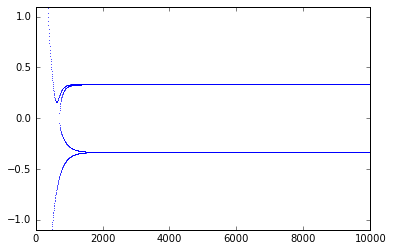

In [158]:
#xlim([-1.1,1.1]),
ylim([-1.1,1.1])
plot(raices,puntos[:,1],'.',markersize=0.8)
show()

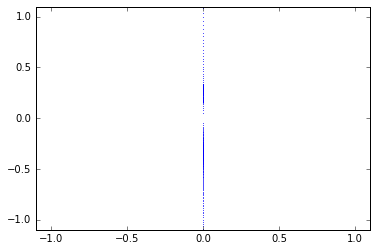

In [159]:
xlim([-1.1,1.1]),ylim([-1.1,1.1])
plot(puntos[:,0],puntos[:,1],'.',markersize=0.8)
show()

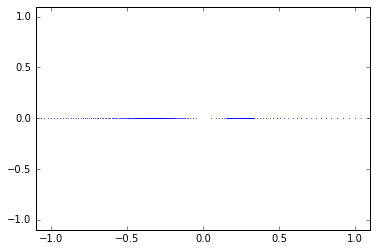

In [160]:
xlim([-1.1,1.1]),ylim([-1.1,1.1])
plot(puntos[:,1],puntos[:,0],'.',markersize=0.8)
show()

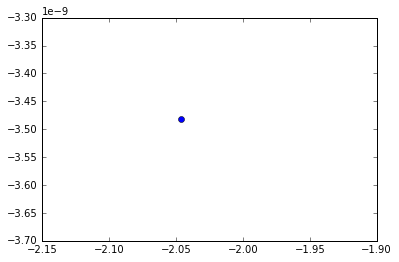

In [161]:
#xlim([-1.1,1.1]),ylim([-1.1,1.1])
plot(puntos[100,1],puntos[100,0],'o')
show()

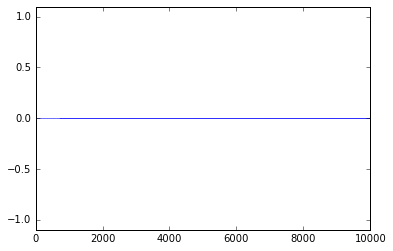

In [165]:
ylim([-1.1,1.1])
plot(raices,puntos[:,0],'.',markersize=0.1)